In [7]:
import os.path as op
import sys
path_to_script = "."
pth = op.join(path_to_script, "../../micrant/")
pth = op.join(path_to_script, "../../scaffan/")
sys.path.insert(0, pth)

import micrant

import micrant.micrant_app

In [2]:
mapp = micrant.micrant_app.MicrAnt()

xfn = mapp.parameters.param("Output", "Common Spreadsheet File").value()

import pandas as pd

df = pd.read_excel(xfn)
# mapp.report.additional_spreadsheet_fn

2019-11-20 14:32:39.091 | DEBUG    | micrant.micrant_app:__init__:61 - common_spreadsheet_file loaded as: C:/Users/Jirik/data/micrant_data.xlsx


In [41]:
unique_df = df.drop_duplicates(subset=["File Name","Annotation ID"], keep="first")
unique_df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Method', 'Annotation Title', 'Datetime', 'File Name',
       'File Path', 'MicrAnt Version', 'Output Directory Path',
       'platform.node', 'platform.processor', 'platform.system'],
      dtype='object')

In [42]:
for index, row in unique_df.iterrows():
    print(row['File Path'], row['Annotation ID'])
    


C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 0
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 1
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 2
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 3
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 5
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 6
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 7
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 8
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 10
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 11
C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 12
C:\User

In [6]:
import matplotlib.pyplot as plt

In [31]:
import numpy as np
np.random.random([5,5])

array([[0.90067569, 0.63563397, 0.17773104, 0.95201006, 0.13918644],
       [0.23855374, 0.19796922, 0.27840726, 0.24996136, 0.40484403],
       [0.0419222 , 0.0702509 , 0.07693937, 0.20262591, 0.1627783 ],
       [0.53757889, 0.92195971, 0.42388203, 0.43062576, 0.43960822],
       [0.98952401, 0.79881541, 0.35751684, 0.90264045, 0.72657914]])

# Sorted by parameter

In [103]:
colname = "SNI"
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*\.?\d*)')[0])
    return df



def get_parameter_from_df(df, colname):
    """
    Pick up parameter for non processed data from Annotation Details and keep parameter column in all other rows.
    """
    df_nothing = get_col_from_ann_details(df[df["Annotation Method"] == "nothing"], "SNI")
    df_not_nothing = df[df["Annotation Method"] != "nothing"]
    df_all_with_param = pd.concat([df_nothing, df_not_nothing], axis=0, ignore_index=True, sort=True).sort_values(colname)
    return df_all_with_param
df_all_with_param = get_parameter_from_df(df, colname)

In [52]:
df_all_with_param

,Annotation Color,Annotation Details,Annotation ID,Annotation Method,Annotation Title,Datetime,File Name,File Path,MicrAnt Version,Output Directory Path,SNI,platform.node,platform.processor,platform.system
0,#0000FF,SNI=2 IFE=0 SQZ=0.6,0,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
1,#0000FF,SNI=2 IFE=0 SQZ=0.4,1,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
2,#0000FF,SNI=2 IFE=0 SQZ=0.5,2,nothing,ID=2,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
3,#0000FF,SNI=2 IFE=0 SQZ=0.4,3,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
4,#0000FF,SNI=2 IFE=0 SQZ=0.2,5,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
5,#0000FF,SNI=2 IFE=0 SQZ=0.6,6,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
6,#0000FF,IFE=0 CVM=0 SNI=2 SQZ=0.4,7,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
7,#0000FF,SNI=1 IFE=0 SQZ=0.3,8,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,1.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
8,#0000FF,SNI=2 IFE=0 SQZ=0.2,10,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows
9,#0000FF,IFE=0 CVM=1 SNI=2 SQZ=0.2,11,nothing,NaN,2019-11-20 14:31:15,PIG-004_BBJ-004-2 _HE_parenchyme.ndpi,C:\Users\Jirik\data\medical\orig\Scaffan-analy...,0.0.0,C:/Users/Jirik/data/SA_20191120_143047,2.0,genomnote4,"Intel64 Family 6 Model 142 Stepping 10, Genuin...",Windows


# Get image from id

outer annotation found [18]


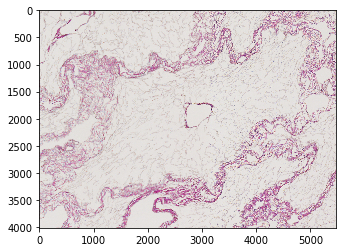

In [66]:
ann_id = 4

def get_image_from_ann_id(anim, ann_id):
    outer_ids = anim.select_outer_annotations(ann_id)
    if len(outer_ids) == 0:
        view_ann_id = ann_id
        margin = 0.5
    else:
        print(f"outer annotation found {outer_ids}")
        view_ann_id = outer_ids[0]
        margin = 0.1

        

    view = anim.get_view(annotation_id=view_ann_id, margin=margin)
    img = view.get_region_image()
    return img

img = get_image_from_ann_id(anim, ann_id)
plt.imshow(img)

In [100]:
import scaffan
import scaffan.image

def generate_images(unique_df):
    anim = None
    prev_pth = ""
    for index, row in unique_df.iterrows():
        pth = row["File Path"]
        if prev_pth != pth:
            anim = scaffan.image.AnnotatedImage(pth)
        img = get_image_from_ann_id(anim, row["Annotation ID"])
        print(f"ann ID={row['Annotation ID']}" )
        prev_pth = pth
        yield row, img
    
import copy
              
def generate_image_couples(unique_df):
    anim = None
    prev_pth = ""
    prev_row = None
    prev_img = None
    for index, row in unique_df.iterrows():
        pth = row["File Path"]
        if prev_pth != pth:
            anim = scaffan.image.AnnotatedImage(pth)
        ann_id = row["Annotation ID"]
        img = get_image_from_ann_id(anim, ann_id)
        print(f"ann ID={ann_id}" )
        if prev_row is not None:
            yield row, img, prev_row, prev_img
        prev_pth = pth
        prev_row = row
        prev_img = img
        print("za jildem")
print("sdfaee")

sdfaee


2019-11-20 17:55:06.249 | DEBUG    | scaffan.image:__init__:195 - fs_enc: utf-8
2019-11-20 17:55:06.251 | DEBUG    | scaffan.image:__init__:196 - Reading file C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi
2019-11-20 17:55:06.269 | DEBUG    | scaffan.image:read_annotations:272 - Reading the annotation C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-004_BBJ-004-2 _HE_parenchyme.ndpi
2019-11-20 17:55:08.799 | DEBUG    | scaffan.annotation:read_annotations:122 - windows annotation output:b'2019-11-20 17:55:08.569 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'


ann ID=0
za jildem
ann ID=1
za jildem
ann ID=2
za jildem
ann ID=3
za jildem


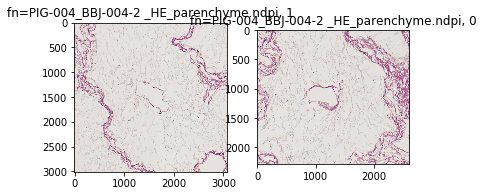

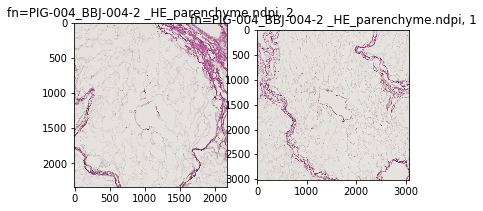

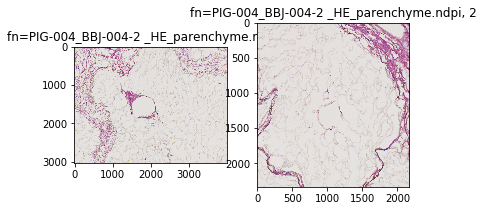

In [101]:
for row, img, prev_row, prev_img in generate_image_couples(unique_df[unique_df["Annotation ID"] < 4]):
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"fn={row['File Name']}, {row['Annotation ID']}")
    plt.subplot(122)
    plt.imshow(prev_img)
    plt.title(f"fn={prev_row['File Name']}, {prev_row['Annotation ID']}")